In [2]:
library(readxl)
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
## download 
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls'
download.file(url, destfile='data/user_knowledge_data.xls')

## read and clean the data
training_data <- read_excel('data/user_knowledge_data.xls', sheet=2, range='A1:F259') %>% 
                mutate(UNS = as_factor(UNS))
test_data <- read_excel('data/user_knowledge_data.xls', sheet=3, range='A1:F146') %>% 
                mutate(UNS = as_factor(UNS))

## clean and wrangle the data
Training_data_clean <- mutate(training_data , UNS = as_factor(UNS))
Test_data_clean <- mutate(test_data, UNS = as_factor(UNS))

Training_data_clean
Test_data_clean


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


In [4]:
## summarize the data 
Training_data_clean <- training_data %>%
                       group_by(UNS) %>%
                       summarize(n = n())

Test_data_clean <- test_data %>%
                       group_by(UNS) %>%
                       summarize(n = n())
                       
training_data_max <- training_data %>%
                     select(-UNS) %>%
                     map_df(max, na.rm = TRUE)


training_data_min <- training_data %>%
                     select(-UNS) %>%
                     map_df(min, na.rm = TRUE)


training_data_avg <- training_data %>%
                     select(-UNS) %>%
                     map_df(mean, na.rm = TRUE)

Training_data_clean
Test_data_clean
training_data_max
training_data_min
training_data_avg

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



UNS,n
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


UNS,n
<fct>,<int>
Very Low,26
Low,46
High,39
Middle,34


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.99,0.9,0.95,0.99,0.93


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0


STG,SCG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


## Scatter plot

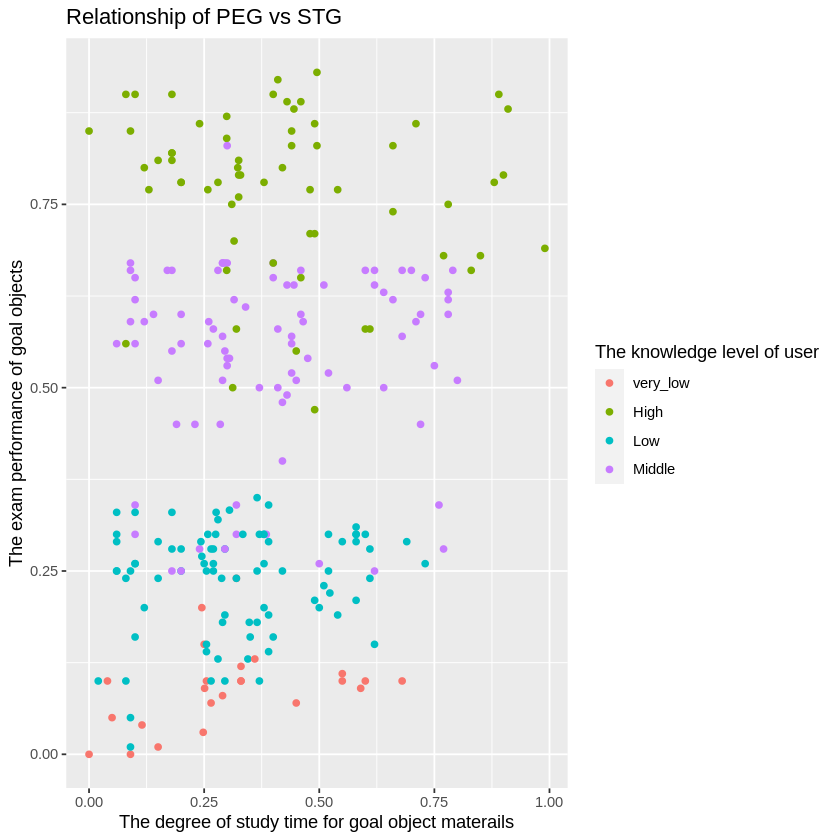

In [5]:
peg_vs_stg <- training_data %>%
            ggplot(aes(x = STG, y = PEG , color = UNS)) +
            geom_point() +
            labs(x = "The degree of study time for goal object materails", y = "The exam performance of goal objects", color = "The knowledge level of user", title = "Relationship of PEG vs STG")
peg_vs_stg